In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
from tensorflow.keras.datasets import cifar10

In [4]:
#loading in the data into x and y
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [21]:
#closer look at the data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


(1,)

In [25]:
y_train[5]

array([1], dtype=uint8)

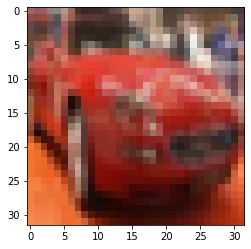

In [23]:
#visualising the data
#plt.figure(figsize=(10,10))
plt.imshow(x_train[5])

In [29]:
#modifying the Y data to something more useable
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
#scaling X
#x_train.max()
x_train = x_train/255
x_test = x_test/255

In [33]:
x_train.max()

1.0

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [58]:
model = Sequential()
#Adding in the Convolution layers and MaxPooling layers
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Flattening out the data
model.add(Flatten())

model.add(Dense(258,activation='relu'))
#A Dense layer with a unit for each category
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 258)               206658    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [60]:
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
#preventing overfitting
stop_early = EarlyStopping(monitor='val_loss',patience=3)

In [62]:
model.fit(x_train,y_train_cat,epochs=50,callbacks=[stop_early],validation_data=(x_test,y_test_cat))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 213s 4ms/sample - loss: 1.4856 - accuracy: 0.4629 - val_loss: 1.2537 - val_accuracy: 0.5434
Epoch 2/50
50000/50000 [==============================] - 179s 4ms/sample - loss: 1.1534 - accuracy: 0.5942 - val_loss: 1.0876 - val_accuracy: 0.6122
Epoch 3/50
50000/50000 [==============================] - 178s 4ms/sample - loss: 1.0093 - accuracy: 0.6468 - val_loss: 1.0088 - val_accuracy: 0.6508
Epoch 4/50
50000/50000 [==============================] - 178s 4ms/sample - loss: 0.8953 - accuracy: 0.6865 - val_loss: 1.0019 - val_accuracy: 0.6513
Epoch 5/50
50000/50000 [==============================] - 184s 4ms/sample - loss: 0.8085 - accuracy: 0.7189 - val_loss: 0.9339 - val_accuracy: 0.6757
Epoch 6/50
50000/50000 [==============================] - 180s 4ms/sample - loss: 0.7341 - accuracy: 0.7443 - val_loss: 0.9223 - val_accuracy: 0.6814
Epoch 7/50
50000/50000 [==========================

In [63]:
metrics = pd.DataFrame(model.history.history)

In [64]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.485608,0.46292,1.253723,0.5434
1,1.153401,0.59424,1.087582,0.6122
2,1.009325,0.64676,1.008765,0.6508
3,0.895296,0.68650,1.001907,0.6513
4,0.808524,0.71892,0.933906,0.6757
5,0.734146,0.74432,0.922287,0.6814
6,0.663349,0.76972,0.934426,0.6867
7,0.601547,0.78872,0.916410,0.6986
8,0.545104,0.81004,1.041251,0.6751
9,0.482469,0.83014,1.074919,0.6806


In [65]:
from sklearn.metrics import classification_report

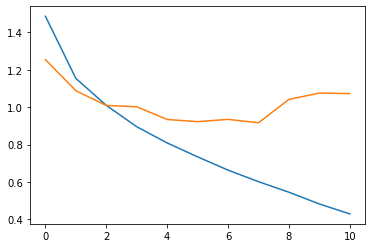

In [68]:
plt.plot(metrics[['loss','val_loss']])

In [69]:
predictions = model.predict_classes(x_test)

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.82      0.78      0.80      1000
           2       0.64      0.54      0.58      1000
           3       0.48      0.55      0.51      1000
           4       0.68      0.61      0.65      1000
           5       0.58      0.56      0.57      1000
           6       0.71      0.82      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.76      0.81      0.78      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [86]:
#testing on a random image
model.predict_classes(x_test[5].reshape(1,32,32,3))

array([6], dtype=int64)

In [87]:
y_test[5]

array([6], dtype=uint8)